In [1]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
# CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [72]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [5]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')


Found 224 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [8]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [9]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/10
8/8 [==============================] - 46s 6s/step - loss: 1.7001 - accuracy: 0.5352 - val_loss: 0.6874 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 40s 5s/step - loss: 0.6643 - accuracy: 0.6172 - val_loss: 0.6633 - val_accuracy: 0.6667
Epoch 3/10
8/8 [==============================] - 40s 5s/step - loss: 0.5563 - accuracy: 0.6914 - val_loss: 0.4567 - val_accuracy: 0.9167
Epoch 4/10
8/8 [==============================] - 40s 5s/step - loss: 0.4170 - accuracy: 0.8242 - val_loss: 0.3569 - val_accuracy: 0.9500
Epoch 5/10
8/8 [==============================] - 39s 5s/step - loss: 0.4551 - accuracy: 0.7812 - val_loss: 0.4027 - val_accuracy: 0.9667
Epoch 6/10
8/8 [==============================] - 38s 5s/step - loss: 0.2974 - accuracy: 0.9023 - val_loss: 0.0934 - val_accuracy: 0.9500
Epoch 7/10
8/8 [==============================] - 40s 5s/step - loss: 0.2311 - accuracy: 0.9219 - val_loss: 0.1776 - val_accuracy: 0.9833
Epoch 8/10
8/8 [==================

Accuracy achieved through this project in training phase is 98.33% and loss is very less.
Accuracy achieved through this project in validation phase is 98.33%

In [55]:

# Class Activation Maps
# Grad-CAM 
import os
y_actual=[]
y_test=[]
for i in os.listdir("C:\Users\Vikas patel\Desktop\CovidDataset\Val\Normal"):
    img=image.load_img("C:\Users\Vicky singh\Desktop\CovidDataset\Val\Normal"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p=model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)
    
    

In [56]:
for i in os.listdir("C:\Users\Vikas patel\Desktop\CovidDataset\Val\Covid"):
    img=image.load_img("C:\Users\Vicky singh\Desktop\CovidDataset\Val\Covid"+i,target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p=model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

Text(50.0, 0.5, 'normal |  covid')

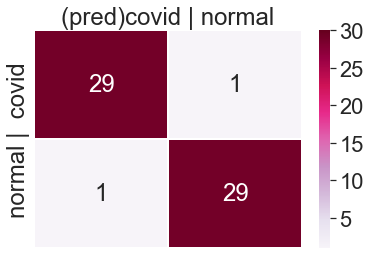

In [69]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_actual,y_test)
import seaborn as sns
sns.set(font_scale=2)
sns.heatmap(cm,cmap="PuRd",vmin=1,vmax=30,linewidth=0.9,annot=True, xticklabels=False, yticklabels=False)
plt.title("(pred)covid | normal")
plt.ylabel("normal |  covid")